In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [68]:
train.head()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.24308670850264,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.82491203459621,1018.8665053152533,A1,NaN,NaN,0.562096
1,1,24.785727,240.003973,1.3596482765960705,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012043660984917,1025.6238537572883,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.26536837560256,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,NaN,1.814399755560454,1010.9226539809573,C3,E00,NaN,0.573776
3,3,53.339567,735.141179,96.19095521176159,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736258932034128,1021.8466633134253,A1,NaN,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073003585226,30.722697,6.0,0.551833,0.000000,0.898062,6.786263,3.632000,0.52268384077164,1008.5559577591927,B2,E00,fixed,0.341874


In [69]:
train.describe()

,id,temperature,irradiance,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,efficiency
count,20000.000000,18999.000000,19013.000000,18989.000000,18973.000000,18990.000000,19007.000000,19023.000000,19022.000000,18990.000000,20000.000000
mean,9999.500000,25.077241,501.273896,17.509758,4.012070,0.698879,16.242251,1.713396,29.923807,51.378575,0.510260
std,5773.647028,12.513129,250.926590,10.097557,2.002268,0.172244,17.889031,1.152953,12.125405,48.473664,0.140420
min,0.000000,0.000000,-597.278646,0.001264,0.000000,0.400149,0.000000,0.000054,0.000000,0.000244,0.000000
25%,4999.750000,16.853522,332.227277,8.777905,3.000000,0.550654,0.000000,0.772311,21.522124,25.081618,0.445613
50%,9999.500000,24.720345,499.654730,17.497731,4.000000,0.697663,12.350138,1.558413,29.857669,49.704133,0.515709
75%,14999.250000,32.848917,668.416734,26.340761,5.000000,0.847838,26.557322,2.474744,38.094943,75.052824,0.590324
max,19999.000000,147.394168,1537.810349,34.998379,15.000000,0.999949,494.279016,7.315597,65.000000,1000.000000,0.987066


### Fixing Dtypes

In [70]:
print('Data Types')
for i in train.columns:
  print(i," = ", train[i].dtype)

Data Types
id  =  int64
temperature  =  float64
irradiance  =  float64
humidity  =  object
panel_age  =  float64
maintenance_count  =  float64
soiling_ratio  =  float64
voltage  =  float64
current  =  float64
module_temperature  =  float64
cloud_coverage  =  float64
wind_speed  =  object
pressure  =  object
string_id  =  object
error_code  =  object
installation_type  =  object
efficiency  =  float64


In [71]:
cols_to_fix = ['humidity', 'wind_speed', 'pressure']

for col in cols_to_fix:
    train[col] = pd.to_numeric(train[col], errors='coerce')
    test[col] = pd.to_numeric(test[col], errors='coerce')

In [72]:
print('Data Types')
for i in train.columns:
  print(i," = ", train[i].dtype)

Data Types
id  =  int64
temperature  =  float64
irradiance  =  float64
humidity  =  float64
panel_age  =  float64
maintenance_count  =  float64
soiling_ratio  =  float64
voltage  =  float64
current  =  float64
module_temperature  =  float64
cloud_coverage  =  float64
wind_speed  =  float64
pressure  =  float64
string_id  =  object
error_code  =  object
installation_type  =  object
efficiency  =  float64


### Numerical and Categorical Columns

In [73]:
cat_cols = ['string_id', 'error_code', 'installation_type']
num_cols = ['temperature', 'irradiance', 'humidity', 'panel_age',
       'maintenance_count', 'soiling_ratio', 'voltage', 'current',
       'module_temperature', 'cloud_coverage', 'wind_speed', 'pressure']

# Data Preprocessing

## 0 Values

In [74]:
print('0 Values')
for col in train.columns:
    print(col, '=', (train[col]==0).sum())

0 Values
id = 1
temperature = 389
irradiance = 0
humidity = 0
panel_age = 0
maintenance_count = 349
soiling_ratio = 0
voltage = 5158
current = 0
module_temperature = 20
cloud_coverage = 0
wind_speed = 0
pressure = 0
string_id = 0
error_code = 0
installation_type = 0
efficiency = 631


Remove zeroes from all cols except efficiency and id

In [75]:
zero_cols = ['temperature','maintenance_count','voltage','module_temperature'] 

In [76]:
for col in zero_cols:
    median_val = train.loc[train[col] != 0, col].median()  # only non-zero median
    train[col] = train[col].replace(0, median_val)
    test[col] = test[col].replace(0, median_val)

In [77]:
print('0 Values')
for col in train.columns:
    print(col, '=', (train[col]==0).sum())

0 Values
id = 1
temperature = 0
irradiance = 0
humidity = 0
panel_age = 0
maintenance_count = 0
soiling_ratio = 0
voltage = 0
current = 0
module_temperature = 0
cloud_coverage = 0
wind_speed = 0
pressure = 0
string_id = 0
error_code = 0
installation_type = 0
efficiency = 631


## Null values

In [78]:
print('NULL Values')
for col in train.columns:
    print(col, " = ", (train[col].isnull()==True).sum())

NULL Values
id  =  0
temperature  =  1001
irradiance  =  987
humidity  =  127
panel_age  =  1011
maintenance_count  =  1027
soiling_ratio  =  1010
voltage  =  993
current  =  977
module_temperature  =  978
cloud_coverage  =  1010
wind_speed  =  119
pressure  =  135
string_id  =  0
error_code  =  5912
installation_type  =  5028
efficiency  =  0


#### Numerical Cols

In [79]:
for col in num_cols:
    median = train[col].median()
    train[col].fillna(median, inplace=True)
    test[col].fillna(median, inplace=True)

#### Categorical Cols

In [80]:
for col in cat_cols:
    mode_val = train[col].mode()[0]
    train[col].fillna(mode_val, inplace=True)
    test[col].fillna(mode_val, inplace=True)

In [81]:
print('NULL Values')
for col in train.columns:
    print(col, " = ", (train[col].isnull()==True).sum())

NULL Values
id  =  0
temperature  =  0
irradiance  =  0
humidity  =  0
panel_age  =  0
maintenance_count  =  0
soiling_ratio  =  0
voltage  =  0
current  =  0
module_temperature  =  0
cloud_coverage  =  0
wind_speed  =  0
pressure  =  0
string_id  =  0
error_code  =  0
installation_type  =  0
efficiency  =  0


## Removing Outliers

In [82]:
def outlier_counts(col):
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)


    IQR = Q3 - Q1
    lower = Q1 - 2 * IQR
    upper = Q3 + 2 * IQR
    
    print(col)
    print ('Below IQR = ', (train[col] < lower).sum())
    print ('Above IQR = ', (train[col] > upper).sum())
    
    train[col] = train[col].clip(lower, upper)
    return

In [83]:
for col in num_cols:
    outlier_counts(col)

temperature
Below IQR =  0
Above IQR =  34
irradiance
Below IQR =  13
Above IQR =  13
humidity
Below IQR =  0
Above IQR =  0
panel_age
Below IQR =  0
Above IQR =  0
maintenance_count
Below IQR =  0
Above IQR =  153
soiling_ratio
Below IQR =  0
Above IQR =  0
voltage
Below IQR =  0
Above IQR =  780
current
Below IQR =  0
Above IQR =  39
module_temperature
Below IQR =  0
Above IQR =  0
cloud_coverage
Below IQR =  0
Above IQR =  32
wind_speed
Below IQR =  0
Above IQR =  0
pressure
Below IQR =  8
Above IQR =  6


## Binning and Encoding

In [84]:
train.head()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency
0,0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.824912,1018.866505,A1,E00,tracking,0.562096
1,1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012044,1025.623854,D4,E00,dual-axis,0.396447
2,2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,49.704133,1.814400,1010.922654,C3,E00,tracking,0.573776
3,3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736259,1021.846663,A1,E00,dual-axis,0.629009
4,4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,19.822846,0.898062,6.786263,3.632000,0.522684,1008.555958,B2,E00,fixed,0.341874


### Binning maintenance_count col

In [85]:
train['maintenance_count'].value_counts()

4.0    5079
3.0    3744
5.0    2988
2.0    2785
6.0    1948
1.0    1331
7.0    1108
8.0     593
9.0     424
Name: maintenance_count, dtype: int64

In [86]:
def bin_maintenance(val):
    if val <= 2:
        return 0  # Very Low
    elif val <= 4:
        return 1  # Low
    elif val <= 6:
        return 2  # Moderate
    else:
        return 3  # High

train['maintenance_count_binned'] = train['maintenance_count'].apply(bin_maintenance)
test['maintenance_count_binned'] = test['maintenance_count'].apply(bin_maintenance)


### Binning panel_age

<Axes: xlabel='panel_age', ylabel='Count'>

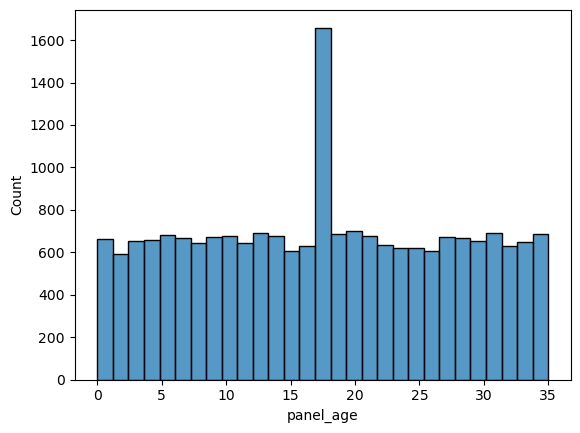

In [87]:
sns.histplot(data=train['panel_age'])

In [88]:
def bin_age(val):
    if val <= 10:
        return 0  # Very Low
    elif val <= 20:
        return 1  # Low
    elif val <= 30:
        return 2  # Moderate
    else:
        return 3  # High

train['panel_age_binned'] = train['panel_age'].apply(bin_age)
test['panel_age_binned'] = test['panel_age'].apply(bin_age)

In [89]:
train.head()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,cloud_coverage,wind_speed,pressure,string_id,error_code,installation_type,efficiency,maintenance_count_binned,panel_age_binned
0,0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,62.494044,12.824912,1018.866505,A1,E00,tracking,0.562096,1,3
1,1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,43.851238,12.012044,1025.623854,D4,E00,dual-axis,0.396447,3,1
2,2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,49.704133,1.814400,1010.922654,C3,E00,tracking,0.573776,1,0
3,3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,67.361473,8.736259,1021.846663,A1,E00,dual-axis,0.629009,1,1
4,4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,19.822846,0.898062,6.786263,3.632000,0.522684,1008.555958,B2,E00,fixed,0.341874,2,3


### Encoding categorical cols

In [90]:
cat_cols

['string_id', 'error_code', 'installation_type']

In [91]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['string_id', 'error_code', 'installation_type']

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first')

In [92]:
# Fit on train
encoder.fit(train[categorical_cols])

# Transform train and test
train_encoded = encoder.transform(train[categorical_cols])
test_encoded = encoder.transform(test[categorical_cols])

/Users/prasannatupe/Anaconda/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [93]:
encoded_col_names = encoder.get_feature_names_out(categorical_cols)

In [94]:
train_encoded_df = pd.DataFrame(train_encoded, columns=encoded_col_names, index=train.index)
test_encoded_df = pd.DataFrame(test_encoded, columns=encoded_col_names, index=test.index)

In [95]:
train = train.drop(columns=categorical_cols)
test = test.drop(columns=categorical_cols)

train = pd.concat([train, train_encoded_df], axis=1)
test = pd.concat([test, test_encoded_df], axis=1)

In [96]:
train.head()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,...,efficiency,maintenance_count_binned,panel_age_binned,string_id_B2,string_id_C3,string_id_D4,error_code_E01,error_code_E02,installation_type_fixed,installation_type_tracking
0,0,7.817315,576.179270,41.243087,32.135501,4.0,0.803199,37.403527,1.963787,13.691147,...,0.562096,1,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,24.785727,240.003973,1.359648,19.977460,8.0,0.479456,21.843315,0.241473,27.545096,...,0.396447,3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,46.652695,687.612799,91.265368,1.496401,4.0,0.822398,48.222882,4.191800,43.363708,...,0.573776,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,53.339567,735.141179,96.190955,18.491582,3.0,0.837529,46.295748,0.960567,57.720436,...,0.629009,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5.575374,12.241203,27.495073,30.722697,6.0,0.551833,19.822846,0.898062,6.786263,...,0.341874,2,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Scaling Features

In [97]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = ['temperature', 'irradiance', 'humidity', 'soiling_ratio', 
              'voltage', 'current', 'module_temperature', 'cloud_coverage', 
              'wind_speed', 'pressure']

# Initialize scaler
scaler = StandardScaler()

# Fit on train and transform both train and test
train[scale_cols] = scaler.fit_transform(train[scale_cols])
test[scale_cols] = scaler.transform(test[scale_cols])

In [98]:
train.head()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,...,efficiency,maintenance_count_binned,panel_age_binned,string_id_B2,string_id_C3,string_id_D4,error_code_E01,error_code_E02,installation_type_fixed,installation_type_tracking
0,0,-1.601213,0.306837,-0.308344,32.135501,4.0,0.621931,1.405779,0.230806,-1.379468,...,0.562096,1,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,-0.060545,-1.069242,-1.702011,19.977460,8.0,-1.307016,0.068342,-1.304946,-0.204106,...,0.396447,3,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1.924893,0.762972,1.439608,1.496401,4.0,0.736325,2.335728,2.217479,1.137937,...,0.573776,1,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,2.532035,0.957521,1.611726,18.491582,3.0,0.826475,2.170086,-0.663745,2.355954,...,0.629009,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,-1.804772,-2.001552,-0.788748,30.722697,6.0,-0.875776,-0.105322,-0.719479,-1.965275,...,0.341874,2,3,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Feature Engineering

- Power Output 

Efficiency is based on energy output. Power = Voltage × Current.

In [99]:
train['power_output'] = train['voltage'] * train['current']
test['power_output'] = test['voltage'] * test['current']

- Temperature Difference (Module - Ambient)

Difference in temperature often affects panel efficiency

In [100]:
train['temp_diff'] = train['module_temperature'] - train['temperature']
test['temp_diff'] = test['module_temperature'] - test['temperature']

- Soiling Impact

Why: More dust + less irradiance = more impact.

In [101]:
train['soiling_impact'] = train['soiling_ratio'] * (1 - train['irradiance'])
test['soiling_impact'] = test['soiling_ratio'] * (1 - test['irradiance'])

- Humidity × Temperature

High humidity + heat can be more detrimental.

In [102]:
train['humid_temp_interaction'] = train['humidity'] * train['temperature']
test['humid_temp_interaction'] = test['humidity'] * test['temperature']

- Maintenance per Year

Normalize maintenance_count by panel age (with +1 to avoid division by zero)

In [103]:
train['maint_per_year'] = train['maintenance_count'] / (train['panel_age'] + 1)
test['maint_per_year'] = test['maintenance_count'] / (test['panel_age'] + 1)

### Scale new features

In [104]:
train.head()

,id,temperature,irradiance,humidity,panel_age,maintenance_count,soiling_ratio,voltage,current,module_temperature,...,string_id_D4,error_code_E01,error_code_E02,installation_type_fixed,installation_type_tracking,power_output,temp_diff,soiling_impact,humid_temp_interaction,maint_per_year
0,0,-1.601213,0.306837,-0.308344,32.135501,4.0,0.621931,1.405779,0.230806,-1.379468,...,0.0,0.0,0.0,0.0,1.0,0.324462,0.221745,0.431100,0.493725,0.120716
1,1,-0.060545,-1.069242,-1.702011,19.977460,8.0,-1.307016,0.068342,-1.304946,-0.204106,...,1.0,0.0,0.0,0.0,0.0,-0.089183,-0.143561,-2.704533,0.103048,0.381362
2,2,1.924893,0.762972,1.439608,1.496401,4.0,0.736325,2.335728,2.217479,1.137937,...,0.0,0.0,0.0,0.0,1.0,5.179428,-0.786956,0.174530,2.771092,1.602307
3,3,2.532035,0.957521,1.611726,18.491582,3.0,0.826475,2.170086,-0.663745,2.355954,...,0.0,0.0,0.0,0.0,0.0,-1.440383,-0.176081,0.035107,4.080946,0.153913
4,4,-1.804772,-2.001552,-0.788748,30.722697,6.0,-0.875776,-0.105322,-0.719479,-1.965275,...,0.0,0.0,0.0,1.0,0.0,0.075777,-0.160502,-2.628686,1.423510,0.189139


In [105]:
new_features = ['power_output', 'temp_diff', 'soiling_impact', 'humid_temp_interaction', 'maint_per_year']

In [106]:
# Fit on train and transform both train and test
train[new_features] = scaler.fit_transform(train[new_features])
test[new_features] = scaler.transform(test[new_features])

# Model Building

In [107]:
X = train.drop(columns=['id', 'efficiency'])  # Drop id and target
y = train['efficiency']

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [109]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

In [110]:
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [111]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Validation MSE: {mse:.4f}")
print(f"Validation R2 Score: {r2:.4f}")


Validation MSE: 0.0116
Validation R2 Score: 0.4219


In [112]:
Score = 100*(1-np.sqrt(mse))
Score

89.2198699471166

# Trying new models

In [113]:
from lightgbm import LGBMRegressor

model = LGBMRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=10,
    num_leaves=31,
    random_state=42
)

model.fit(X_train, y_train)
preds = model.predict(X_val)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4112
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 26
[LightGBM] [Info] Start training from score 0.511069


In [114]:
rmse = np.sqrt(mean_squared_error(y_val, model.predict(X_val)))
score = 100 * (1 - rmse)
print("Score:", score)

Score: 89.3100982168379


In [115]:
from xgboost import XGBRegressor

model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=10,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)
preds = model.predict(X_val)

In [116]:
rmse = np.sqrt(mean_squared_error(y_val, model.predict(X_val)))
score = 100 * (1 - rmse)
print("Score:", score)

Score: 89.08707005785172


In [121]:
from catboost import CatBoostRegressor

CBmodel = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=10,
    verbose=0,
    random_state=42
)

CBmodel.fit(X_train, y_train)
preds = model.predict(X_val)

In [122]:
rmse = np.sqrt(mean_squared_error(y_val, CBmodel.predict(X_val)))
score = 100 * (1 - rmse)
print("Score:", score)

Score: 89.33188134780676


### Final Submission

In [119]:
submission = pd.read_csv('dataset/sample_submission.csv')

In [120]:
submission.head()

,id,efficiency
0,0,0.415846
1,1,0.578047
2,2,0.478029
3,3,0.391611
4,4,0.469754


In [123]:
X_test = test.drop(columns=['id'])  # Drop ID column
test_preds = CBmodel.predict(X_test)  

In [124]:
submission = pd.DataFrame({
    'id': test['id'],
    'efficiency': test_preds
})


In [125]:
submission

,id,efficiency
0,0,0.411457
1,1,0.539754
2,2,0.513507
3,3,0.457047
4,4,0.481479
...,...,...
11995,11995,0.562093
11996,11996,0.491730
11997,11997,0.605992
11998,11998,0.450665


In [126]:
submission.to_csv('final_submission1.csv', index=False)